In [1]:
import os
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import torch
import numpy as np

In [2]:
def get_curve_data(pretrained=True, dataset='cifar10', model='resnet56'):
    folder_path = 'curve'
    if pretrained:
        folder_path = os.path.join(folder_path, 'pretrained')
        
    filenames = [name for name in os.listdir(folder_path) if name.startswith('-'.join([dataset,model]))]
    keys = [name for name in filenames]
    paths = [os.path.join(folder_path, name) for name in filenames]
    return {key: torch.load(fp) for key, fp in zip(keys, paths)}

In [3]:
def plot(pretrained=True, dataset='cifar10', model='resnet56', curve_type='train', ylim=[40,75]):
    
    curve_data = get_curve_data(pretrained, dataset=dataset, model=model)
    curve_data_keys = curve_data.keys()

    plt.figure()
    
    for key in curve_data_keys:
        plt.plot(np.array(curve_data[key]['{}'.format(curve_type)]), label='-'.join(key.split('-')[2:4]))

    plt.xlabel('Epoch')
    plt.ylabel('Train Loss' if curve_type=='train_loss' else 'Test Accuracy %')
    plt.ylim(ylim)
    plt.grid(ls='--')
    plt.legend()
        
    plt.show()

<IPython.core.display.Javascript object>


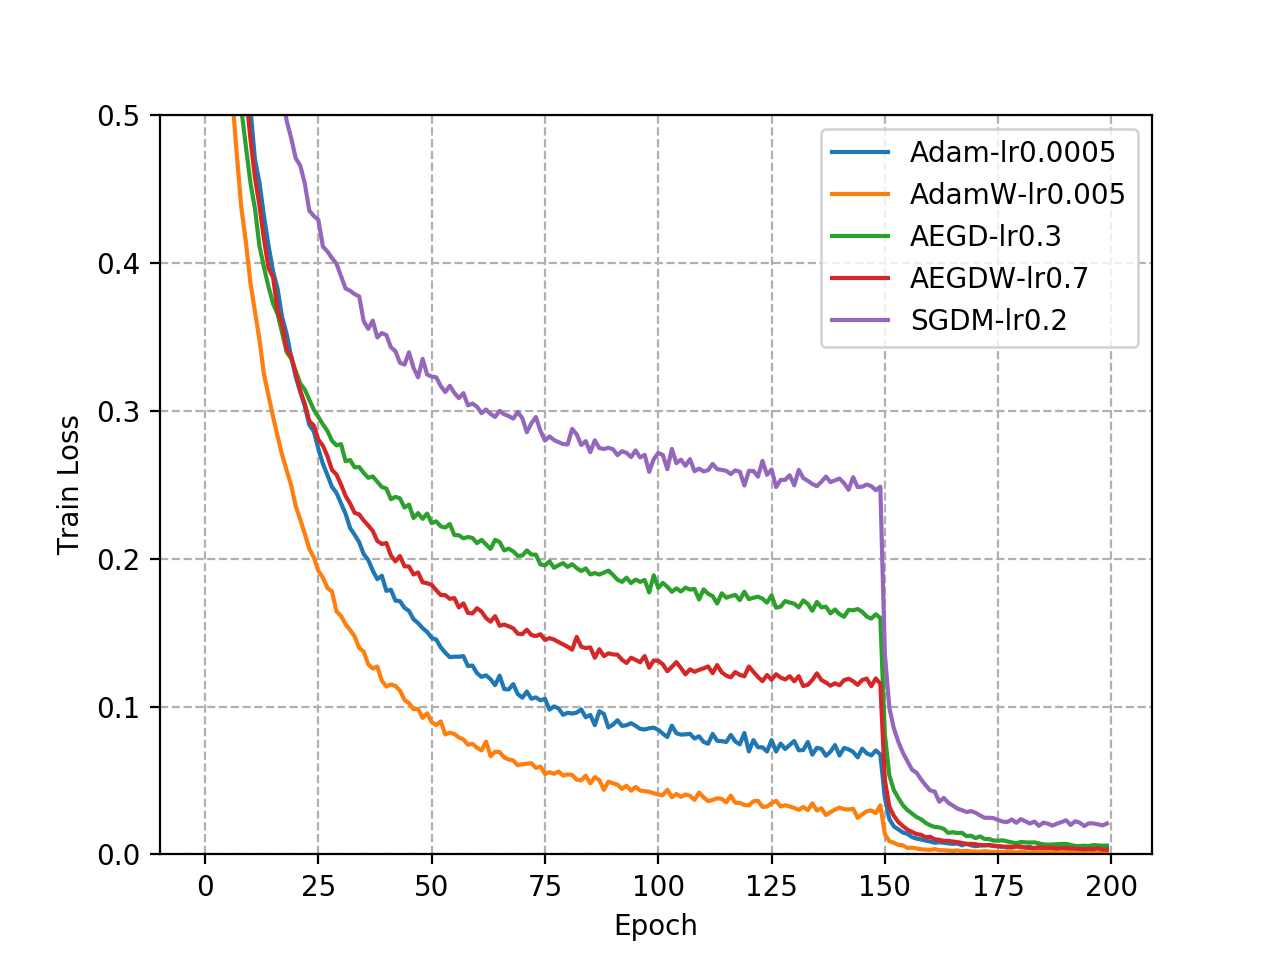

In [4]:
plot(pretrained=True, dataset='cifar10', model='resnet56', curve_type='train_loss', ylim=[0,0.5])

<IPython.core.display.Javascript object>


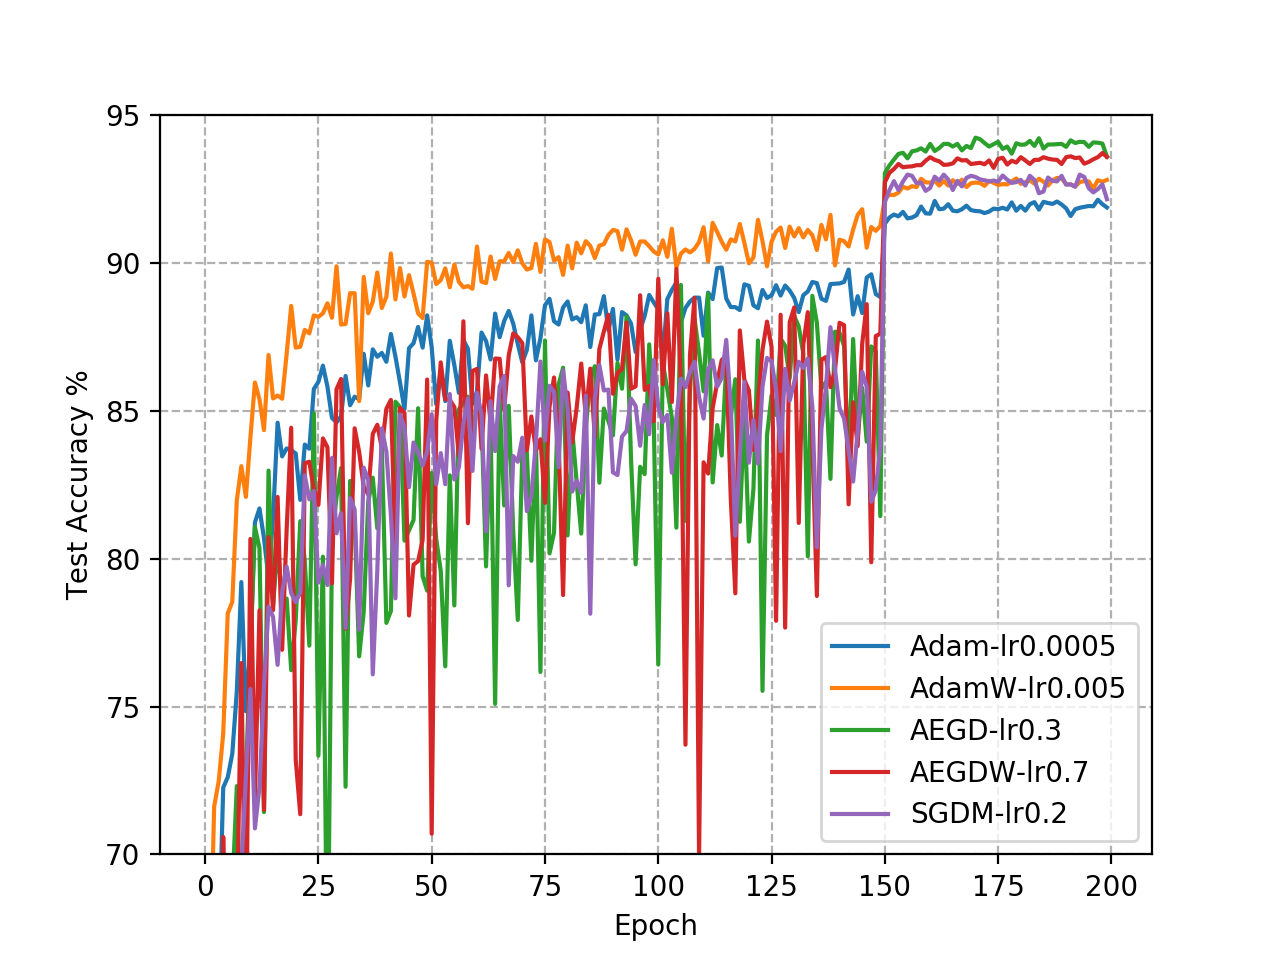

In [5]:
plot(pretrained=True, dataset='cifar10', model='resnet56', curve_type='test_acc', ylim=[70,95])

<IPython.core.display.Javascript object>


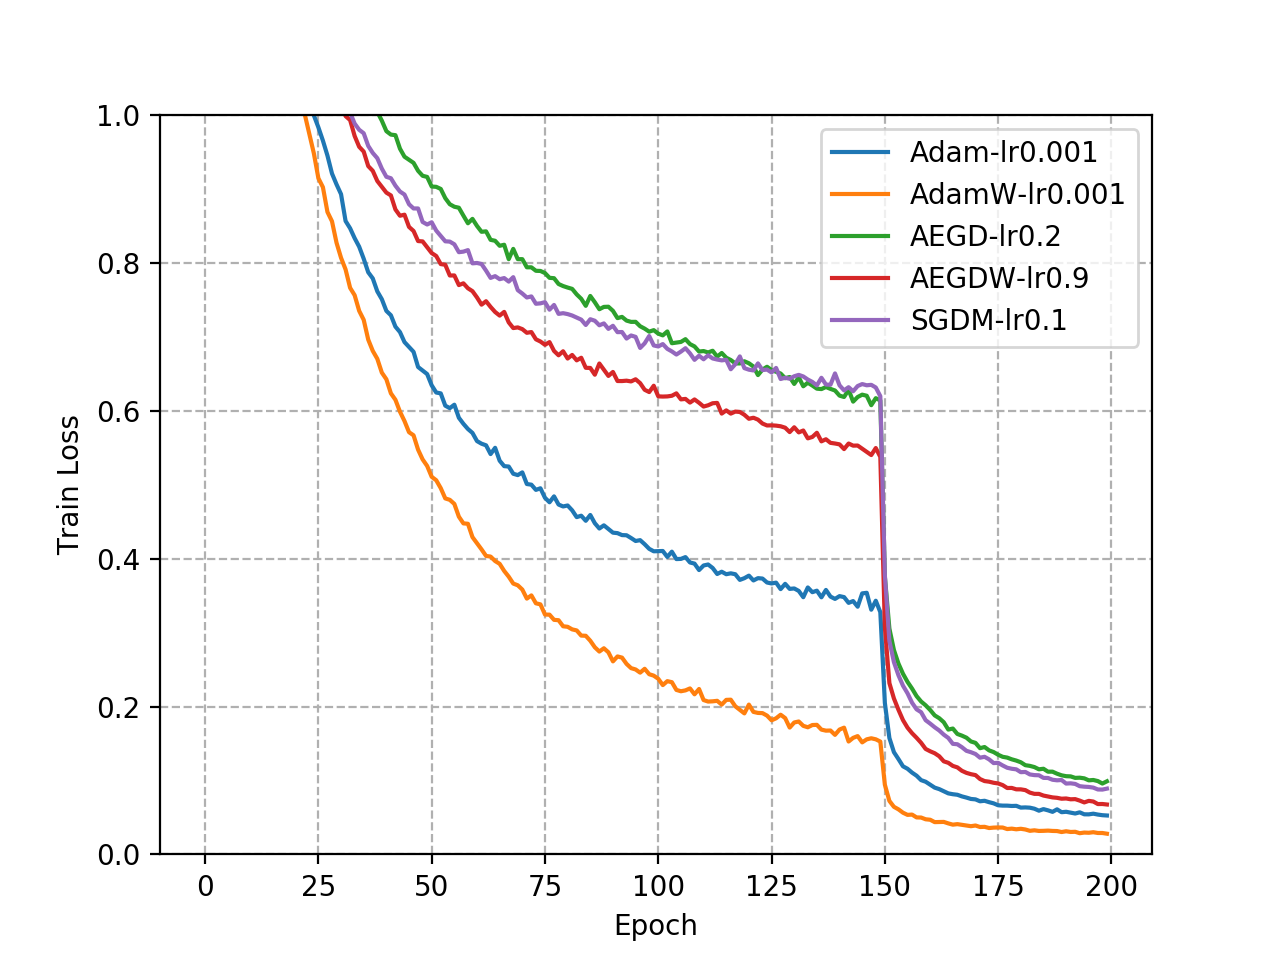

In [42]:
plot(pretrained=True, dataset='cifar100', model='squeezenet', curve_type='train_loss', ylim=[0,1])

<IPython.core.display.Javascript object>


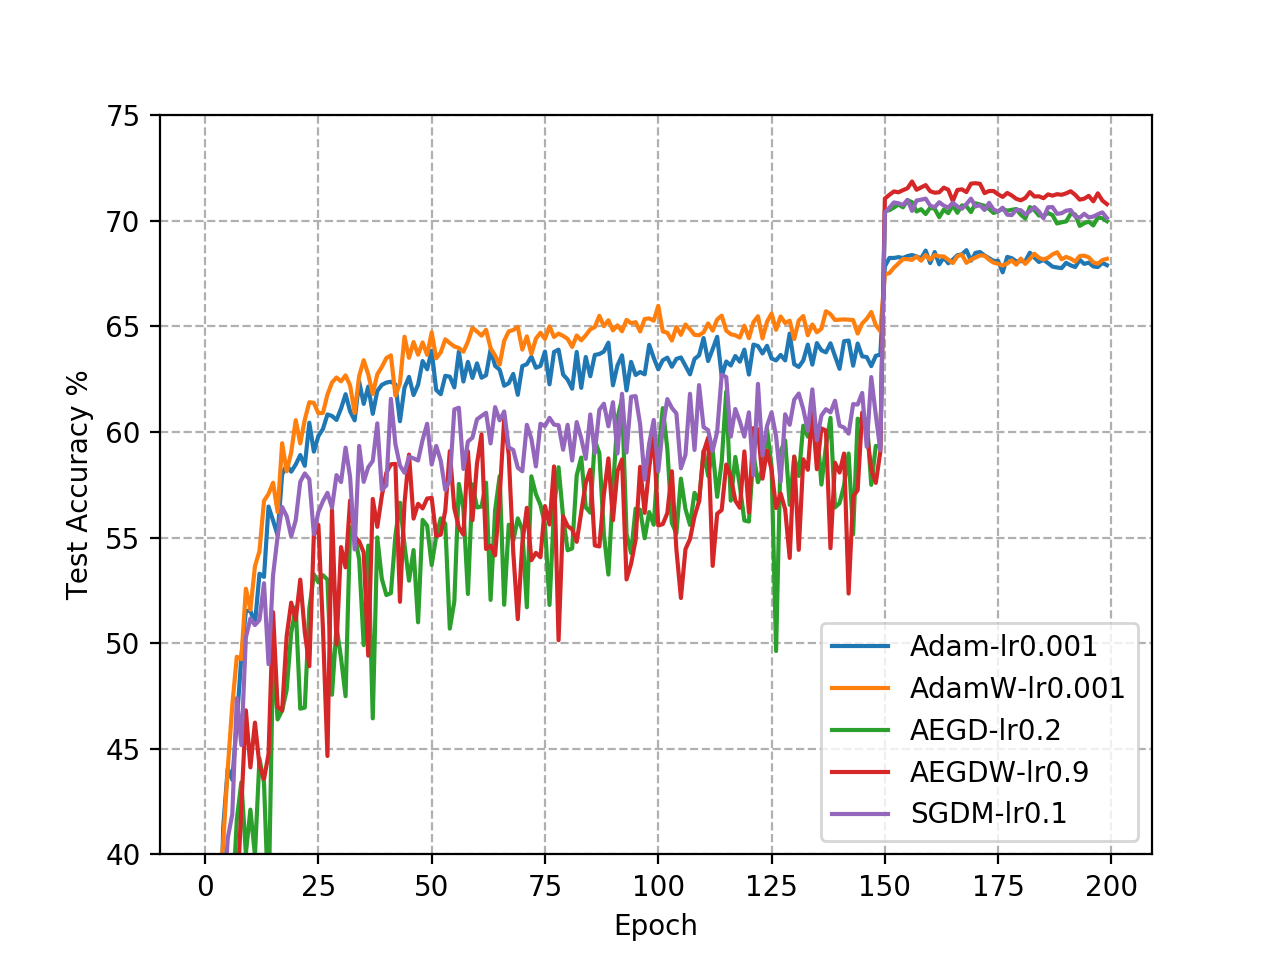

In [6]:
plot(pretrained=True, dataset='cifar100', model='squeezenet', curve_type='test_acc', ylim=[40,75])